In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)   

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
filename = 'autoprice.csv'

In [10]:
download(url, filename)

In [2]:
df = pd.read_csv('autoprice.csv')

In [3]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


![](LR.jpg)

# Simple Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression()

In [6]:
X = df[['highway-mpg']]
Y = df[['price']]

In [7]:
lm.fit(X,Y)

LinearRegression()

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [9]:
lm.intercept_

array([38423.30585816])

In [10]:
lm.coef_

array([[-821.73337832]])

Price = 38423.31 - 821.73 x highway-mpg

In [11]:
lm1 = LinearRegression()

In [12]:
X = df[['engine-size']]
Y = df[['price']]

In [13]:
lm.intercept_

array([38423.30585816])

In [14]:
lm.coef_

array([[-821.73337832]])

In [15]:
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [16]:
Price

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

# Multiple Linear Regression¶

What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use 
Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, 
but this method is used to explain the relationship between one continuous response (dependent) variable 
and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. 
We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

Let's develop a model using these variables as the predictor variables.

In [17]:
Z = df[['horsepower', 'highway-mpg', 'curb-weight', 'engine-size']]

In [18]:
X = Z
Y = df[['price']]

In [19]:
lm.fit(X, Y)

LinearRegression()

In [20]:
lm.intercept_

array([-15806.62462633])

In [21]:
lm.coef_

array([[53.49574423, 36.05748882,  4.70770099, 81.53026382]])

What is the linear function we get in this example?

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [22]:
lm2 = LinearRegression()

In [23]:
X = df[["normalized-losses","highway-mpg"]]
Y = df[['price']]

In [24]:
lm.fit(X,Y)

LinearRegression()

In [25]:
lm.intercept_

array([38201.31327246])

In [26]:
lm.coef_

array([[   1.49789586, -820.45434016]])

# Model Evaluation Using Visualization

In [27]:
import seaborn as sns 
%matplotlib inline 

Regression plot / scatter plot

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

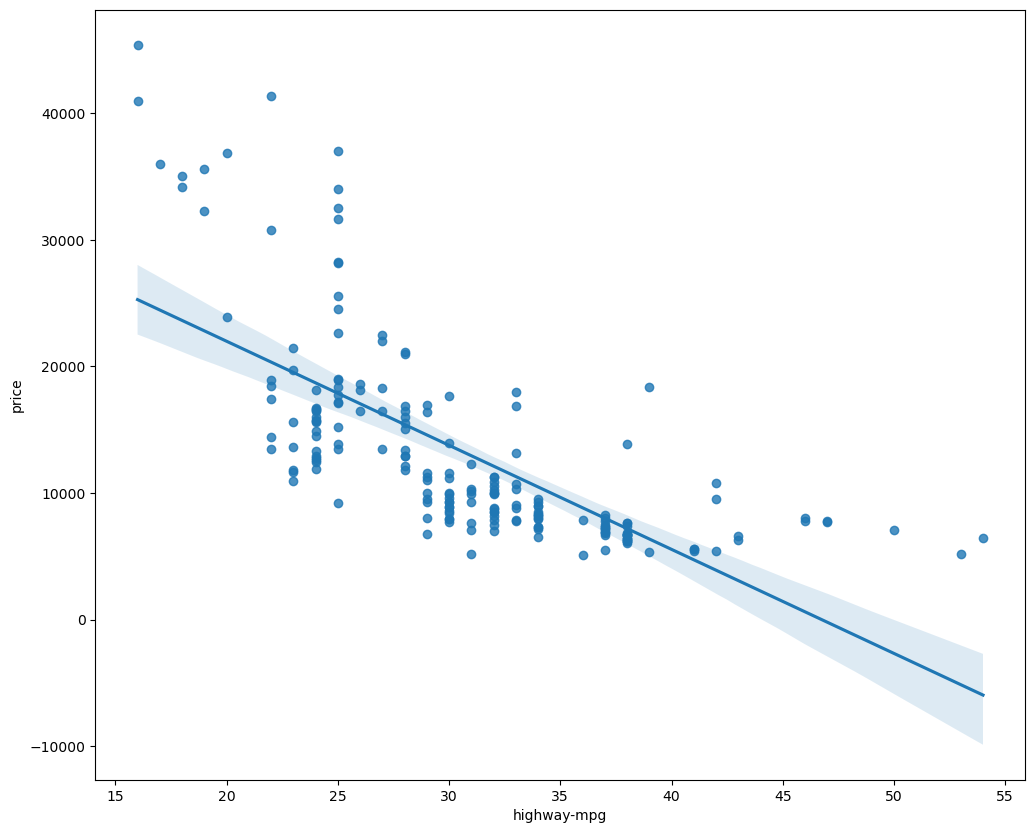

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y = 'price', data=df)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

(0.0, 47414.1)

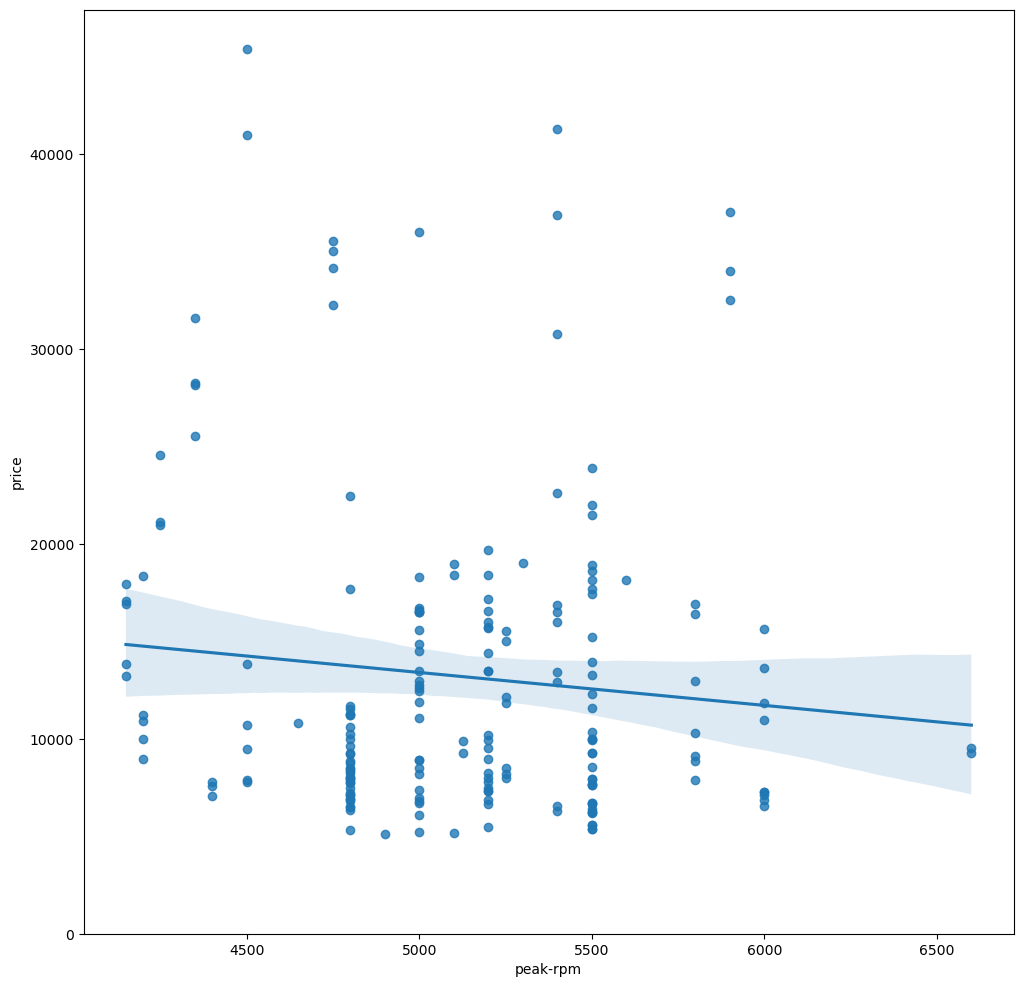

In [29]:
width = 12
height = 12
plt.figure(figsize=(width, height))
sns.regplot(x = 'peak-rpm', y = 'price', data=df)
plt.ylim(0,)

In [30]:
df1 = df[['highway-mpg', 'peak-rpm', 'price']].corr()
df1

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

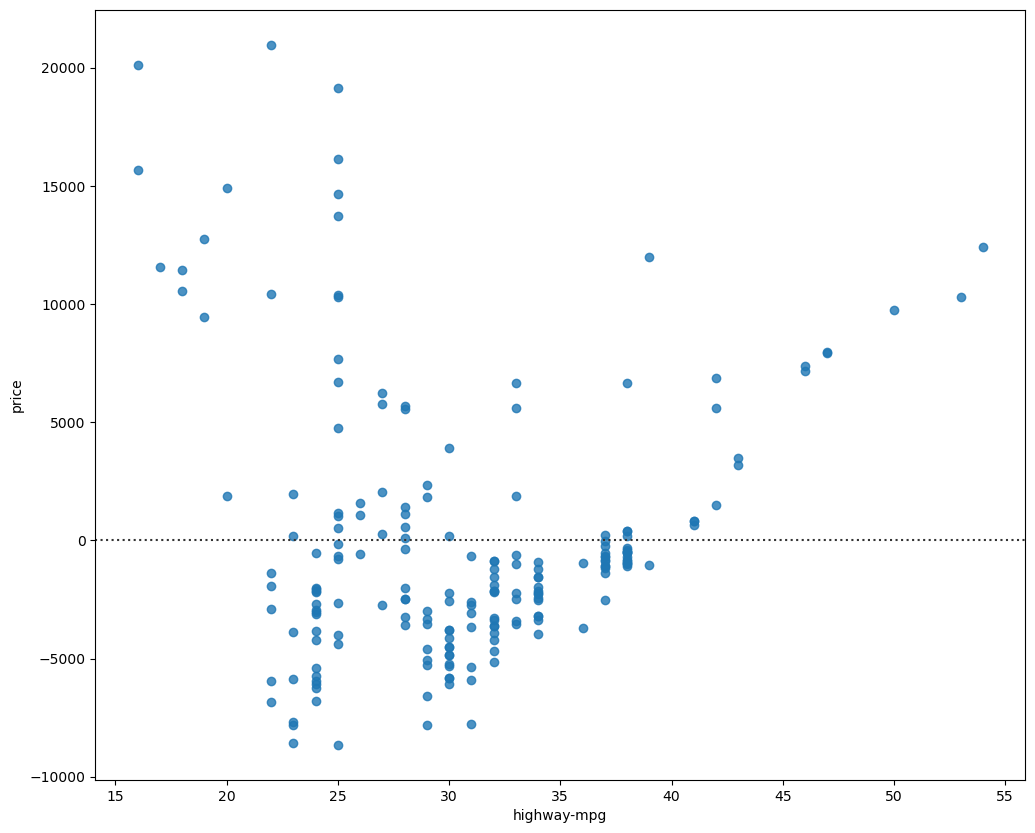

In [31]:
weight = 12
height = 10
plt.figure(figsize=(weight, height))
sns.residplot(x='highway-mpg', y='price', data=df)


We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [32]:
Yhat = lm.predict(X)
Yhat

array([[16231.78938339],
       [16231.78938339],
       [17052.24372355],
       [13833.33798916],
       [20396.97271047],
       [17872.69806371],
       [17926.6223148 ],
       [17872.69806371],
       [22028.89401561],
       [14695.7334135 ],
       [14695.7334135 ],
       [15510.19617021],
       [15510.19617021],
       [17872.69806371],
       [20334.0610842 ],
       [20334.0610842 ],
       [21974.96976453],
       [-5101.52135672],
       [ 3068.57044005],
       [ 3043.10621038],
       [ 4739.43703765],
       [ 7200.80005814],
       [13764.43477944],
       [ 7245.73693404],
       [ 7245.73693404],
       [ 7245.73693404],
       [13809.37165535],
       [13752.45161254],
       [18727.60400874],
       [-5898.00936307],
       [ 7229.26007954],
       [ 3893.51846781],
       [10457.15318911],
       [10457.15318911],
       [10470.63425188],
       [10422.70158426],
       [11285.09700859],
       [11285.09700859],
       [11253.64119546],
       [11253.64119546],


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

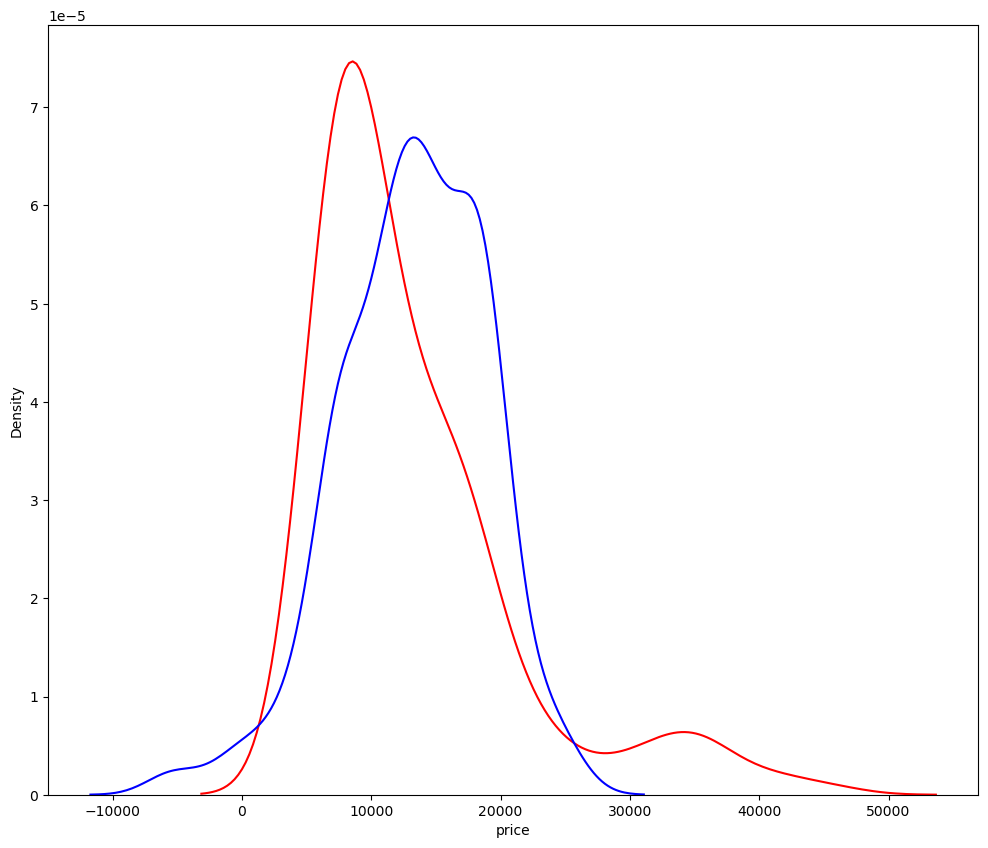

In [33]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1)

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

# 3. Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

Quadratic - 2nd Order\
Yhat=a+b1X+b2X2

Cubic - 3rd Order\
Yhat=a+b1X+b2X2 + b3x3

Higher-Order:\
    Yhat=a+b1X+b2X2 + b3x3 ........

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [35]:
x = df['highway-mpg']
y = df['price']

In [36]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


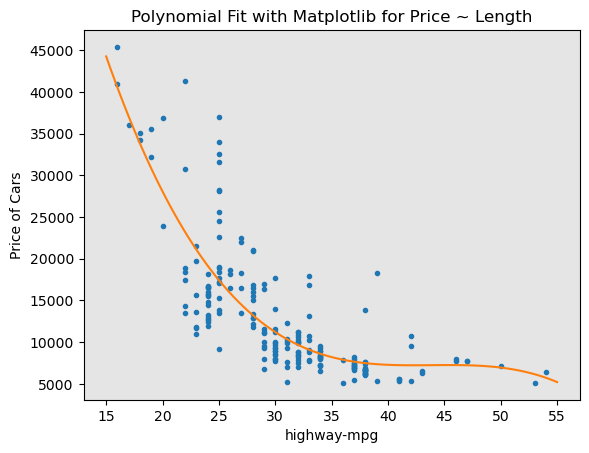

In [37]:
PlotPolly(p, x, y, 'highway-mpg')

In [38]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [39]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)

In [40]:
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


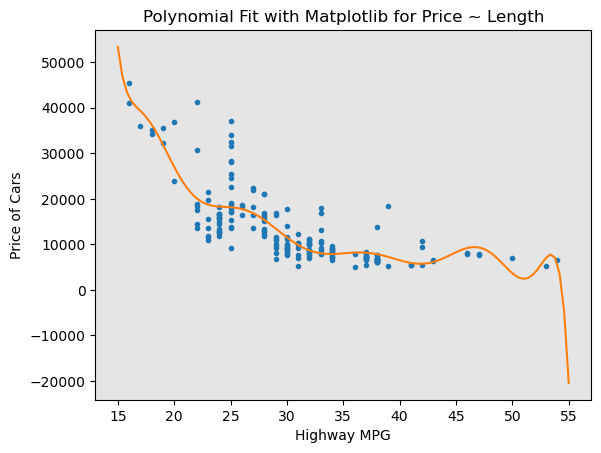

In [41]:
PlotPolly(p1, x, y, 'Highway MPG')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

We can perform a polynomial transform on multiple features. First, we import the module:

In [42]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [43]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [44]:
Z_pr = pr.fit_transform(Z)

In [45]:
Z.shape

(201, 4)

In [95]:
Z_pr.shape

(201, 15)

# Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [97]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [98]:
Input

[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

We input the list as an argument to the pipeline constructor:

In [99]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [100]:
Z.dtypes

horsepower     float64
highway-mpg    float64
curb-weight    float64
engine-size    float64
dtype: object

In [101]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [102]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [109]:
Input2 = [('scale', StandardScaler()), ('model', LinearRegression())]

In [110]:
pipe_2= Pipeline(Input2)

In [111]:
pipe_2.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [113]:
ypipe=pipe_2.predict(Z)
ypipe[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

# 4. Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

Model 1: Simple Linear Regression

In [124]:
X = df[['highway-mpg']]
Y = df[['price']]

In [125]:
lm.fit(X,Y)

LinearRegression()

In [126]:
lm.predict(X)

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508],
       [17879.97140011],
       [17879.97140011],
       [17879.97140011],
       [21988.63829172],
       [14593.03788682],
       [14593.03788682],
       [15414.77126514],
       [15414.77126514],
       [17879.97140011],
       [20345.17153508],
       [20345.17153508],
       [21988.63829172],
       [-5128.5631929 ],
       [ 3088.77059031],
       [ 3088.77059031],
       [ 4732.23734696],
       [ 7197.43748192],
       [13771.3045085 ],
       [ 7197.43748192],
       [ 7197.43748192],
       [ 7197.43748192],
       [13771.3045085 ],
       [13771.3045085 ],
       [18701.70477843],
       [-5950.29657123],
       [ 7197.43748192],
       [ 3910.50396864],
       [10484.37099521],
       [10484.37099521],
       [10484.37099521],
       [10484.37099521],
       [11306.10437353],
       [11306.10437353],
       [11306.10437353],
       [11306.10437353],


In [130]:
from sklearn.metrics import max_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

In [131]:
print('max error is', max_error(X,Y))
print('')

max error is 45384.0
